In [4]:
# pip install gspread oauth2client requests twilio


  Obtaining dependency information for gspread from https://files.pythonhosted.org/packages/5a/46/f9fe3b4834ab93a0e621c942fbc289fc2fc9626c77c2d36e41937be454a8/gspread-6.1.2-py3-none-any.whl.metadata
  Using cached gspread-6.1.2-py3-none-any.whl.metadata (11 kB)
Using cached gspread-6.1.2-py3-none-any.whl (57 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
#import gspread
from oauth2client.service_account import ServiceAccountCredentials
#from google.api_core.datetime_helpers import DatetimeWithNanoseconds
from datetime import datetime
from twilio.rest import Client
import requests

  Obtaining dependency information for gspread from https://files.pythonhosted.org/packages/5a/46/f9fe3b4834ab93a0e621c942fbc289fc2fc9626c77c2d36e41937be454a8/gspread-6.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for oauth2client from https://files.pythonhosted.org/packages/95/a9/4f25a14d23f0786b64875b91784607c2277eff25d48f915e39ff0cff505a/oauth2client-4.1.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for twilio from https://files.pythonhosted.org/packages/43/88/15fbbddfb1ec2b0a9f2fde65dd20e013b59e19ce83854181b370869a4f45/twilio-9.1.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-oauthlib>=0.4.1 from https://files.pythonhosted.org/packages/71/bf/9e125754d1adb3bc4bd206c4e5df756513b1d23675ac06caa471278d1f3f/google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp>=3.8.4 from https://files.pythonhosted.org/packages/a4/69/0d415c6d8450842652ce01b29f43416a0f30122b75899d

In [54]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from datetime import datetime
import requests

def scrape_earthquake_data():
    url = "https://scedc.caltech.edu/recent/Quakes/quakes.big.html"
    dfs = pd.read_html(url)
    # Assuming the earthquake data is in the first table
    earthquake_data = dfs[0]
    return earthquake_data

def store_to_google_sheets(data):
    scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
    creds = ServiceAccountCredentials.from_json_keyfile_name('Final_creds.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open('CC Final').sheet1
    # I HAVE ADDED AN EXTRA TIMESTAMP FOR WHEN IT IS SCRAPED BUT WE CAN DO WITHOUT IT AS WELL IG
    
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')  # Get current timestamp
    data['Timestamp'] = timestamp  # Add timestamp column to data
    
    # Assuming the data has headers and you want to append it
    sheet.append_rows(data.values.tolist())

def cloud_function(request=None):
    data = scrape_earthquake_data()
    store_to_google_sheets(data)
    return "Data stored successfully!"



In [55]:
# Call the cloud function to test
cloud_function()

'Data stored successfully!'

In [56]:
# READ DATA FROM CELLS DIRECTLY
data = sheet.cell(2,2).value
data

# Below is an image of the sheet just for reference

'3.2'

![image-2.png](attachment:image-2.png)

In [36]:
data_rows = sheet.row_values(1)
data_rows

['MAP',
 'MAG',
 'LOCAL DATETIME  y/m/d h:m:s',
 'LAT  deg',
 'LON  deg',
 'DEPTH  km',
 'LOCATION',
 '2024-06-09 20:14:46']

In [37]:
data_all = sheet.get_all_values()
data_all

[['MAP',
  'MAG',
  'LOCAL DATETIME  y/m/d h:m:s',
  'LAT  deg',
  'LON  deg',
  'DEPTH  km',
  'LOCATION',
  '2024-06-09 20:14:46'],
 ['MAP',
  '3.2',
  '2024/06/09 02:25:14',
  '36.965N',
  '121.613W',
  '4.42',
  '6 km ( 4 mi) SW of Gilroy, CA',
  '2024-06-09 20:14:46'],
 ['MAP',
  '3.3',
  '2024/06/08 16:33:55',
  '33.342N',
  '116.205W',
  '11.59',
  '17 km (11 mi) SW of Oasis, CA',
  '2024-06-09 20:14:46'],
 ['MAP',
  '4.5',
  '2024/06/08 12:34:29',
  '38.814N',
  '122.822W',
  '3.55',
  '7 km ( 4 mi) NW of The Geysers, CA',
  '2024-06-09 20:14:46'],
 ['MAP',
  '3.0',
  '2024/06/07 13:41:20',
  '40.519N',
  '124.408W',
  '18.87',
  '14 km ( 9 mi) WSW of Ferndale, CA',
  '2024-06-09 20:14:46'],
 ['MAP',
  '4.3',
  '2024/06/07 09:26:33',
  '40.931N',
  '124.916W',
  '10',
  '64 km (40 mi) WNW of Bayview, CA',
  '2024-06-09 20:14:46'],
 ['MAP',
  '3.2',
  '2024/06/07 06:05:54',
  '37.282N',
  '118.690W',
  '9.51000022888184',
  '23 km (14 mi) WSW of West Bishop, CA',
  '2024-06-09 2

In [38]:
# to convert it into a dataframe
data_all = pd.DataFrame(data_all)
data_all

,0,1,2,3,4,5,6,7
0,MAP,MAG,LOCAL DATETIME y/m/d h:m:s,LAT deg,LON deg,DEPTH km,LOCATION,2024-06-09 20:14:46
1,MAP,3.2,2024/06/09 02:25:14,36.965N,121.613W,4.42,"6 km ( 4 mi) SW of Gilroy, CA",2024-06-09 20:14:46
2,MAP,3.3,2024/06/08 16:33:55,33.342N,116.205W,11.59,"17 km (11 mi) SW of Oasis, CA",2024-06-09 20:14:46
3,MAP,4.5,2024/06/08 12:34:29,38.814N,122.822W,3.55,"7 km ( 4 mi) NW of The Geysers, CA",2024-06-09 20:14:46
4,MAP,3.0,2024/06/07 13:41:20,40.519N,124.408W,18.87,"14 km ( 9 mi) WSW of Ferndale, CA",2024-06-09 20:14:46
5,MAP,4.3,2024/06/07 09:26:33,40.931N,124.916W,10,"64 km (40 mi) WNW of Bayview, CA",2024-06-09 20:14:46
6,MAP,3.2,2024/06/07 06:05:54,37.282N,118.690W,9.51000022888184,"23 km (14 mi) WSW of West Bishop, CA",2024-06-09 20:14:46
7,MAP,3.4,2024/06/06 17:04:49,33.630N,117.905W,12.44,"3 km ( 2 mi) ENE of Newport Beach, CA",2024-06-09 20:14:46
8,MAP,3.6,2024/06/06 16:52:24,33.631N,117.910W,12.08,"2 km ( 1 mi) NE of Newport Beach, CA",2024-06-09 20:14:46
9,MAP,4.6,2024/06/05 04:58:40,32.422N,115.180W,15.58,"8 km ( 5 mi) N of Delta, B.C., MX",2024-06-09 20:14:46


In [ ]:
# IN CASE YOU WANT TO CLEAR YOUR SHEET CONTENTS

sheet.clear()

# For updating indivisual cells

sheet.update_cell(2,2,"NA")



In [57]:
import session_info

In [58]:
session_info.show()

### IF WE ONLY WANT THE LATEST ROW INSTEAD OF THE ENTIRE TABLE

In [10]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from datetime import datetime
import requests

def scrape_earthquake_data():
    url = "https://scedc.caltech.edu/recent/Quakes/quakes.big.html"
    dfs = pd.read_html(url)
    # Assuming the earthquake data is in the first table
    earthquake_data = dfs[0]
    return earthquake_data

def store_to_google_sheets(data):
    scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
    creds = ServiceAccountCredentials.from_json_keyfile_name('Final_creds.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open('CC Final').sheet1
    # I HAVE ADDED AN EXTRA TIMESTAMP FOR WHEN IT IS SCRAPED BUT WE CAN DO WITHOUT IT AS WELL IG
    
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')  # Get current timestamp
    
    latest_earthquake = data.iloc[1, :]  # Select only the first row (latest earthquake)
    latest_earthquake['Timestamp'] = timestamp  # Add timestamp to the latest earthquake data
    new_row = latest_earthquake.tolist()
    
    # Insert the new row after headers
    sheet.insert_row(new_row, index=2)  # Insert at index 2 to place it after the headers
    
    #sheet.append_row(latest_earthquake.tolist())  # Append the latest earthquake data to the sheet
    # Assuming the data has headers and you want to append it
    #sheet.append_rows(data.values.tolist())

def cloud_function(request=None):
    data = scrape_earthquake_data()
    store_to_google_sheets(data)
    return "Data stored successfully!"



In [11]:
# Call the cloud function to test
cloud_function()

'Data stored successfully!'

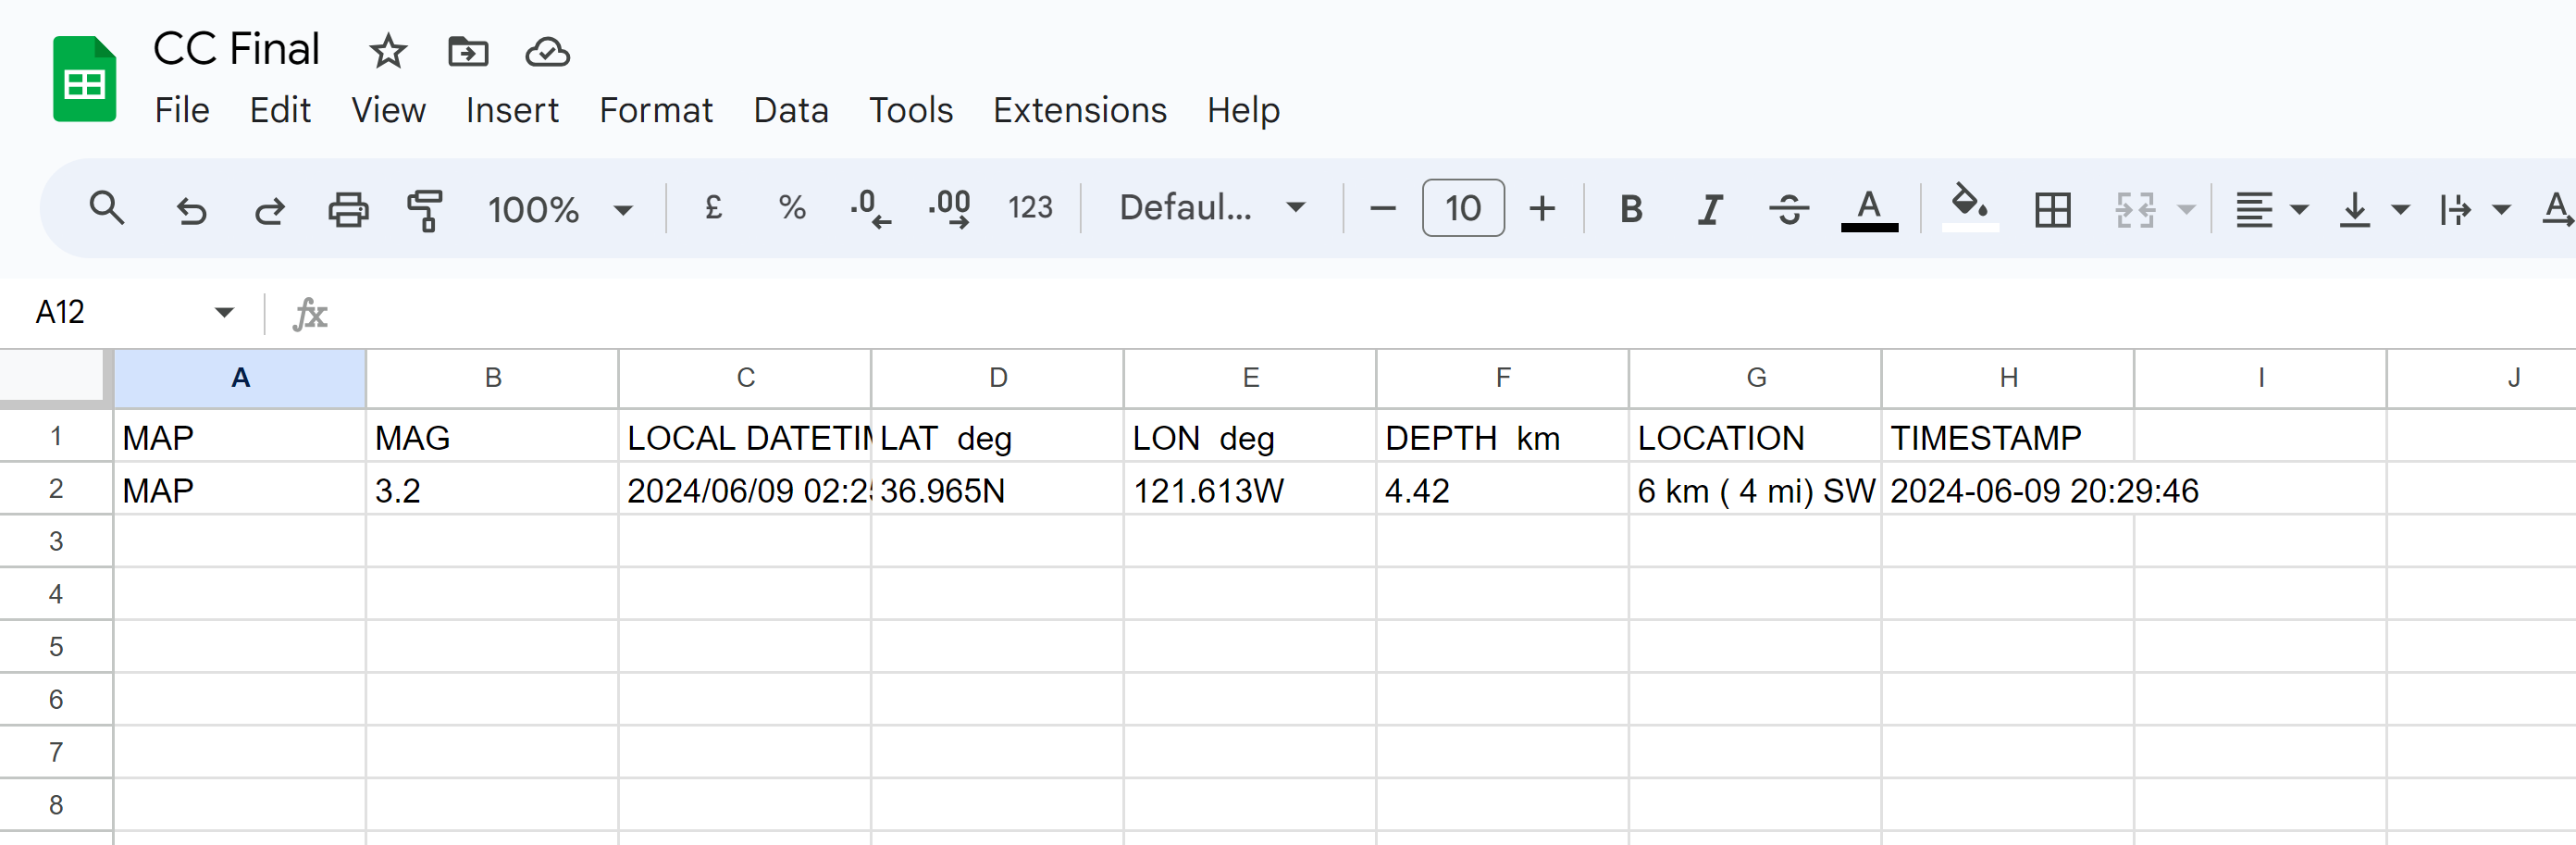

In [31]:
import requests

def test_cloud_function():
    # Replace <CLOUD_FUNCTION_URL> with the actual URL of your deployed cloud function
    cloud_function_url = "https://us-central1-cloud-computing-functions.cloudfunctions.net/earthquake_final"
    
    # Make an HTTP POST request to trigger the cloud function
    response = requests.post(cloud_function_url)
    
    # Check the response status code
    if response.status_code == 200:
        print("Cloud function executed successfully!")
    else:
        print("Error:", response.status_code)

# Call the function to test
test_cloud_function()


Error: 500


In [ ]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from datetime import datetime
from flask import Flask, request

app = Flask(__name__)

def scrape_earthquake_data():
    url = "https://scedc.caltech.edu/recent/Quakes/quakes.big.html"
    dfs = pd.read_html(url)
    # Assuming the earthquake data is in the first table
    earthquake_data = dfs[0]
    return earthquake_data

def store_to_google_sheets(data):
    scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
    creds = ServiceAccountCredentials.from_json_keyfile_name('Final_creds.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open('CC Final').sheet1
    # I HAVE ADDED AN EXTRA TIMESTAMP FOR WHEN IT IS SCRAPED BUT WE CAN DO WITHOUT IT AS WELL IG
    
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # Get current timestamp
    latest_earthquake = data.iloc[1, :]   # Select only the first row (latest earthquake)
    latest_earthquake['Timestamp'] = timestamp  # Add timestamp to the latest earthquake data
    
    sheet.append_row(latest_earthquake.tolist()) # Append the latest earthquake data to the sheet
    # Assuming the data has headers and you want to append it
    #sheet.append_rows(data.values.tolist())

@app.route('/earthquake', methods=['POST'])
def cloud_function():
    data = scrape_earthquake_data()
    store_to_google_sheets(data)
    return "Data stored successfully!"

if __name__ == '__main__':
    port = int(os.environ.get('PORT', 8080))
    app.run(host='0.0.0.0', port=port)


In [13]:
import requests

def test_cloud_function():
    # Replace <CLOUD_FUNCTION_URL> with the actual URL of your deployed cloud function
    cloud_function_url = "https://us-central1-cloud-computing-functions.cloudfunctions.net/earthquake_final"
    
    # Make an HTTP POST request to trigger the cloud function
    response = requests.post(cloud_function_url)
    
    # Check the response status code
    if response.status_code == 200:
        print("Cloud function executed successfully!")
        print("Response:", response.text)
    else:
        print("Error:", response.status_code)
        print("Response:", response.text)

# Call the function to test
test_cloud_function()


Error: 500
Response: 500 Internal Server Error: The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.


In [36]:
!pip install lxml


In [38]:
pip show lxml


Name: lxml
Version: 4.9.2
Summary: Powerful and Pythonic XML processing library combining libxml2/libxslt with the ElementTree API.
Home-page: https://lxml.de/
Author: lxml dev team
Author-email: lxml-dev@lxml.de
License: BSD-3-Clause
Location: C:\Users\akudu\anaconda3\Lib\site-packages
Requires: 
Required-by: nbconvert, pandas-datareader, parsel, pytrends, Scrapy, yfinance
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from datetime import datetime
import requests
import logging

def scrape_earthquake_data():
    try:
        url = "https://scedc.caltech.edu/recent/Quakes/quakes.big.html"
        dfs = pd.read_html(url)
        # Assuming the earthquake data is in the first table
        earthquake_data = dfs[0]
        return earthquake_data
    except Exception as e:
        logging.error(f"Error scraping earthquake data: {e}")
        raise

def store_to_google_sheets(data):
    try:
        scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
        creds = ServiceAccountCredentials.from_json_keyfile_name('Final_creds.json', scope)
        client = gspread.authorize(creds)
        sheet = client.open('CC Final').sheet1
        
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')  # Get current timestamp
        
        latest_earthquake = data.iloc[1, :]  # Select only the first row (latest earthquake)
        latest_earthquake['Timestamp'] = timestamp  # Add timestamp to the latest earthquake data
        
        sheet.append_row(latest_earthquake.tolist())  # Append the latest earthquake data to the sheet
    except Exception as e:
        logging.error(f"Error storing data to Google Sheets: {e}")
        raise

def cloud_function(request=None):
    try:
        data = scrape_earthquake_data()
        store_to_google_sheets(data)
        return "Data stored successfully!"
    except Exception as e:
        logging.error(f"Error in cloud function: {e}")
        return f"Error: {e}", 500